In [2]:
import xarray as xr
import fsspec
import numpy as np
import s3fs
import zarr
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

Loading years: 100%|██████████| 46/46 [00:47<00:00,  1.02s/it]


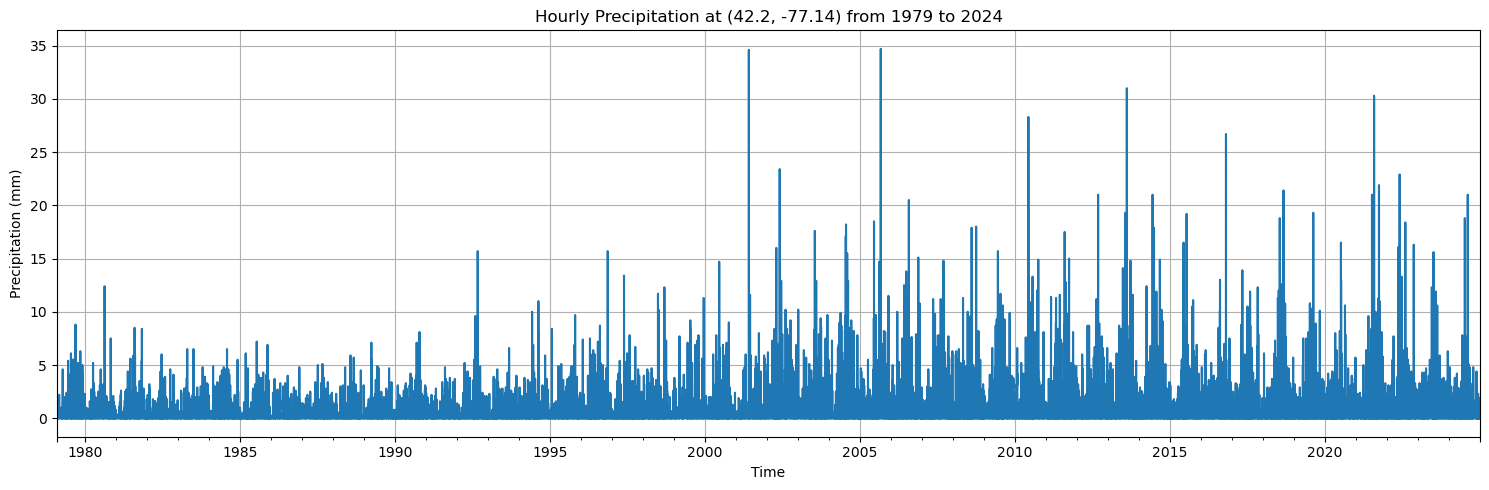

In [2]:
base_url = 's3://noaa-nws-aorc-v1-1-1km'
years = range(1979, 2025)

# NYS location (Albany)
lat_nys = 42.2
lon_nys = -77.14
var = 'APCP_surface'

# Store all years here
all_ts = []

for year in tqdm(years, desc="Loading years"):  
    single_year_url = f"{base_url}/{year}.zarr/"
    
    # Load dataset for one year
    ds = xr.open_zarr(
        single_year_url,
        consolidated=True,
        storage_options={"anon": True}
    )
    
    # Extract time series at nearest lat/lon
    precip_ts = ds[var].sel(
        latitude=lat_nys, longitude=lon_nys, method='nearest'
    )
    
    # Convert to pandas Series and append
    ts_df = precip_ts.to_series()
    all_ts.append(ts_df)

# Concatenate all years into one Series
hourly_series = pd.concat(all_ts)

# Plot full time series
plt.figure(figsize=(15, 5))
hourly_series.plot()
plt.title(f"Hourly Precipitation at ({lat_nys}, {lon_nys}) from 1979 to 2024")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

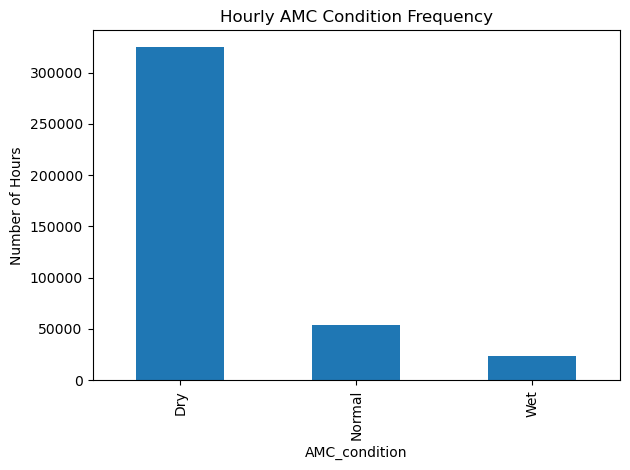

In [8]:
# Combine into a full hourly time series
hourly_series = pd.concat(all_ts)

# Compute rolling 5-day rainfall (120-hour window)
antecedent_5day = hourly_series.rolling(window=120).sum()

# Classification function using hourly timestamps
def classify_amc_hourly(timestamp, total_5d_mm):
    month = timestamp.month
    if pd.isna(total_5d_mm):
        return None
    if 5 <= month <= 10:
        if total_5d_mm < 35.6:
            return 'Dry'
        elif total_5d_mm <= 53.4:
            return 'Normal'
        else:
            return 'Wet'
    else:
        if total_5d_mm < 12.7:
            return 'Dry'
        elif total_5d_mm <= 28:
            return 'Normal'
        else:
            return 'Wet'

# Apply classification to every hourly timestamp
amc_class = pd.Series(
    [classify_amc_hourly(ts, rain) for ts, rain in antecedent_5day.items()],
    index=antecedent_5day.index
)

# Combine into DataFrame
df_hourly_amc = pd.DataFrame({
    'hourly_rain_mm': hourly_series,
    'antecedent_5day_mm': antecedent_5day,
    'AMC_condition': amc_class
})

# Preview
#print(df_hourly_amc.head(24))

# Optional: plot AMC condition frequency
df_hourly_amc['AMC_condition'].value_counts().plot(kind='bar', title='Hourly AMC Condition Frequency')
plt.ylabel("Number of Hours")
plt.tight_layout()
plt.show()

C:\Users\Omid Emamjomehzadeh\AppData\Local\Temp\ipykernel_65820\2533392319.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max = hourly_series.resample('Y').max()


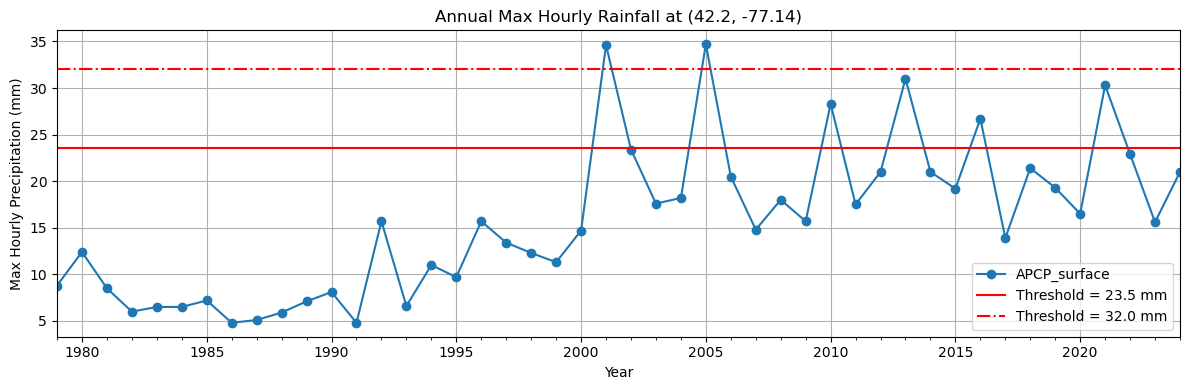

In [5]:
# Resample to annual max
annual_max = hourly_series.resample('Y').max()

# Calculate threshold in mm
thresh_1 = 0.927 * 25.4 
thresh_2 = 1.26 * 25.4  

# Plot
plt.figure(figsize=(12, 4))
annual_max.plot(marker='o')
plt.axhline(thresh_1, color='red', linestyle='-', label=f'Threshold = {thresh_1:.1f} mm')
plt.axhline(thresh_2, color='red', linestyle='-.', label=f'Threshold = {thresh_2:.1f} mm')

plt.title(f"Annual Max Hourly Rainfall at ({lat_nys}, {lon_nys})")
plt.ylabel("Max Hourly Precipitation (mm)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

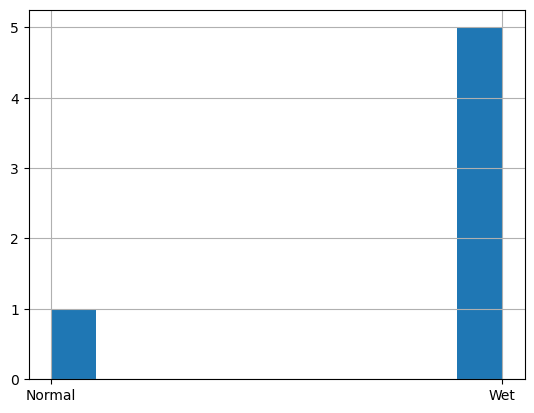

In [6]:
thresh=0.927*25.4
df_hourly_amc[hourly_series>thresh]['AMC_condition'].hist()

<Axes: >

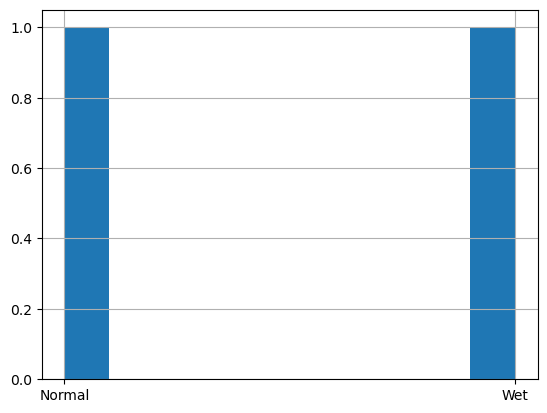

In [7]:
df_hourly_amc[hourly_series>thresh_2]['AMC_condition'].hist()

# new coordinates

In [8]:
base_url = 's3://noaa-nws-aorc-v1-1-1km'
years = range(1979, 2025)

# 41.2, -73.8
lat_nys = 41.2
lon_nys = -73.8
var = 'APCP_surface'

# Store all years here
all_ts = []

for year in tqdm(years, desc="Loading years"):  
    single_year_url = f"{base_url}/{year}.zarr/"
    
    # Load dataset for one year
    ds = xr.open_zarr(
        single_year_url,
        consolidated=True,
        storage_options={"anon": True}
    )
    
    # Extract time series at nearest lat/lon
    precip_ts = ds[var].sel(
        latitude=lat_nys, longitude=lon_nys, method='nearest'
    )
    
    # Convert to pandas Series and append
    ts_df = precip_ts.to_series()
    all_ts.append(ts_df)

# Concatenate all years into one Series
hourly_series = pd.concat(all_ts)



Loading years: 100%|██████████| 46/46 [00:55<00:00,  1.21s/it]


In [13]:
annual_max_idx

time
1979-12-31   1979-09-06 12:00:00
1980-12-31   1980-03-21 12:00:00
1981-12-31   1981-04-14 12:00:00
1982-12-31   1982-08-25 11:00:00
1983-12-31   1983-08-11 12:00:00
1984-12-31   1984-12-03 12:00:00
1985-12-31   1985-09-27 02:00:00
1986-12-31   1986-11-19 13:00:00
1987-12-31   1987-04-04 08:00:00
1988-12-31   1988-09-04 12:00:00
1989-12-31   1989-05-16 12:00:00
1990-12-31   1990-11-10 11:00:00
1991-12-31   1991-05-06 12:00:00
1992-12-31   1992-11-23 07:00:00
1993-12-31   1993-11-28 11:00:00
1994-12-31   1994-06-25 06:00:00
1995-12-31   1995-10-28 12:00:00
1996-12-31   1996-07-13 12:00:00
1997-12-31   1997-05-03 12:00:00
1998-12-31   1998-10-08 12:00:00
1999-12-31   1999-09-16 15:00:00
2000-12-31   2000-12-17 14:00:00
2001-12-31   2001-06-17 09:00:00
2002-12-31   2002-08-02 23:00:00
2003-12-31   2003-09-28 10:00:00
2004-12-31   2004-08-21 18:00:00
2005-12-31   2005-06-29 19:00:00
2006-12-31   2006-08-28 12:00:00
2007-12-31   2007-08-08 10:00:00
2008-12-31   2008-08-11 17:00:00
2009-

In [12]:
annual_max_values

time
1979-09-06 12:00:00    15.300000
1980-03-21 12:00:00    22.500000
1981-04-14 12:00:00    11.000000
1982-08-25 11:00:00    18.500000
1983-08-11 12:00:00    16.800000
1984-12-03 12:00:00    14.100000
1985-09-27 02:00:00    10.500000
1986-11-19 13:00:00    23.500000
1987-04-04 08:00:00    10.000000
1988-09-04 12:00:00    22.300000
1989-05-16 12:00:00    23.400000
1990-11-10 11:00:00    11.500000
1991-05-06 12:00:00    15.000000
1992-11-23 07:00:00    11.400000
1993-11-28 11:00:00    12.500000
1994-06-25 06:00:00    10.900000
1995-10-28 12:00:00    14.200000
1996-07-13 12:00:00    17.000000
1997-05-03 12:00:00    17.100000
1998-10-08 12:00:00    19.300000
1999-09-16 15:00:00    19.600000
2000-12-17 14:00:00    13.200000
2001-06-17 09:00:00    13.800000
2002-08-02 23:00:00    23.300000
2003-09-28 10:00:00    24.900000
2004-08-21 18:00:00    35.800001
2005-06-29 19:00:00    40.900001
2006-08-28 12:00:00    28.400000
2007-08-08 10:00:00    17.300000
2008-08-11 17:00:00    23.300000
2009-

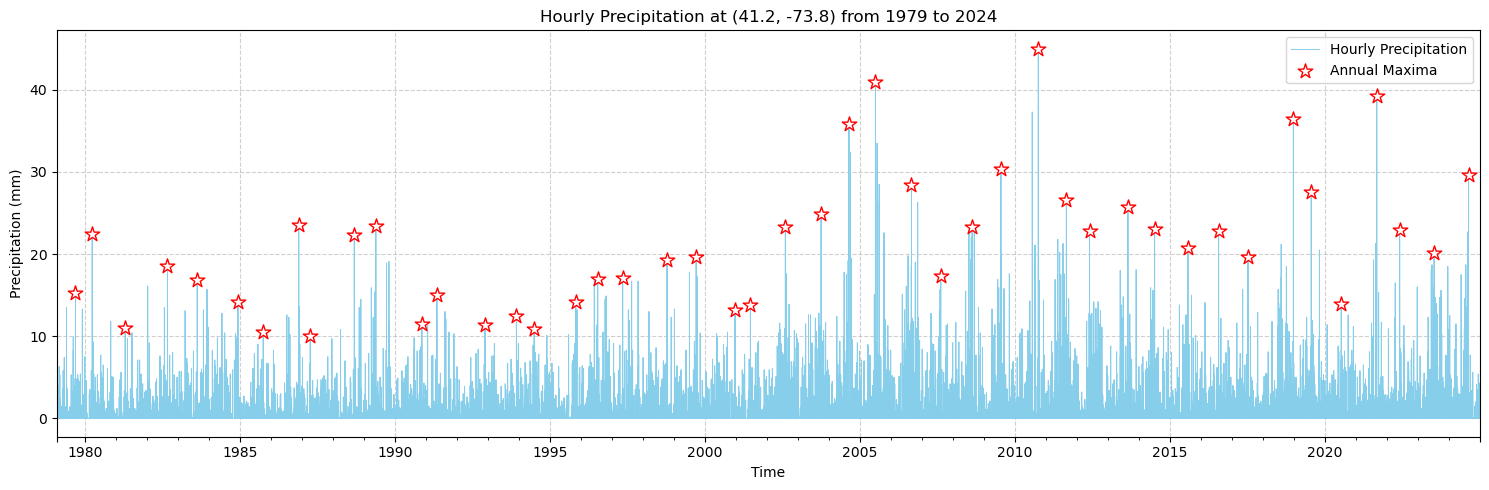

In [15]:
# Ensure datetime index and sorted
hourly_series.index = pd.to_datetime(hourly_series.index)
hourly_series = hourly_series.sort_index()

# Get annual maxima
annual_max_idx = hourly_series.resample('YE').apply(lambda x: x.idxmax()).dropna()
annual_max_values = hourly_series.loc[annual_max_idx].dropna()

# Ensure all dates are valid
annual_max_values = annual_max_values[annual_max_values.index.isin(hourly_series.index)]

# Plot
plt.figure(figsize=(15, 5))
hourly_series.plot(label='Hourly Precipitation', color='skyblue', linewidth=0.7)

plt.scatter(
    annual_max_values.index,
    annual_max_values.values,
    marker='*',
    facecolors='white',
    edgecolors='red',
    s=120,
    label='Annual Maxima',
    zorder=5
)

plt.title(f"Hourly Precipitation at ({lat_nys}, {lon_nys}) from 1979 to 2024")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Time")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

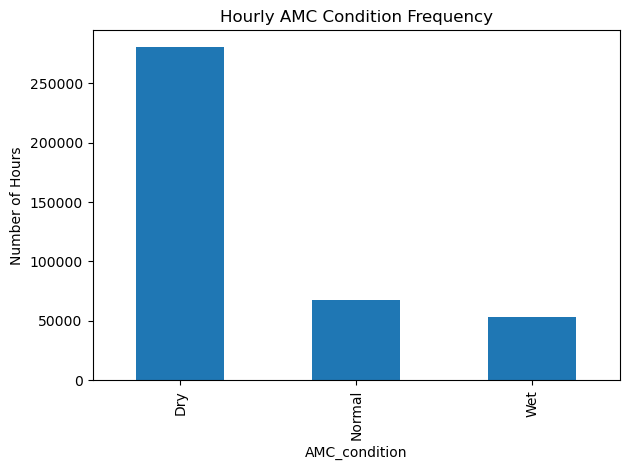

In [31]:
# Combine into a full hourly time series
hourly_series = pd.concat(all_ts)

# Compute rolling 5-day rainfall (120-hour window)
antecedent_5day = hourly_series.rolling(window=120).sum().shift(1)

# Classification function using hourly timestamps
def classify_amc_hourly(timestamp, total_5d_mm):
    month = timestamp.month
    if pd.isna(total_5d_mm):
        return None
    if 5 <= month <= 10:
        if total_5d_mm < 35.6:
            return 'Dry'
        elif total_5d_mm <= 53.4:
            return 'Normal'
        else:
            return 'Wet'
    else:
        if total_5d_mm < 12.7:
            return 'Dry'
        elif total_5d_mm <= 28:
            return 'Normal'
        else:
            return 'Wet'

# Apply classification to every hourly timestamp
amc_class = pd.Series(
    [classify_amc_hourly(ts, rain) for ts, rain in antecedent_5day.items()],
    index=antecedent_5day.index
)

# Combine into DataFrame
df_hourly_amc = pd.DataFrame({
    'hourly_rain_mm': hourly_series,
    'antecedent_5day_mm': antecedent_5day,
    'AMC_condition': amc_class
})

# Preview
#print(df_hourly_amc.head(24))

# Optional: plot AMC condition frequency
df_hourly_amc['AMC_condition'].value_counts().plot(kind='bar', title='Hourly AMC Condition Frequency')
plt.ylabel("Number of Hours")
plt.tight_layout()
plt.show()

C:\Users\Omid Emamjomehzadeh\AppData\Local\Temp\ipykernel_65820\1766713353.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max = hourly_series.resample('Y').max()


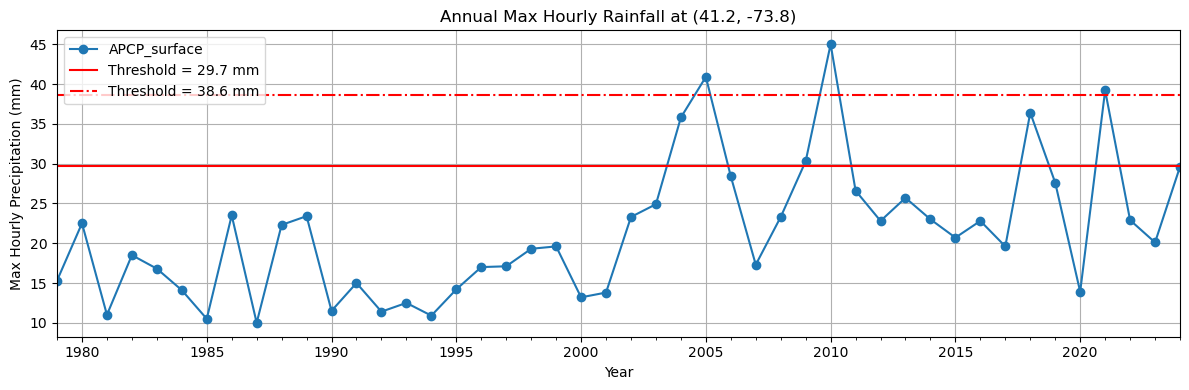

In [ ]:
# Resample to annual max
annual_max = hourly_series.resample('YE').max()

# Calculate threshold in mm
thresh_1 = 1.17 * 25.4 
thresh_2 = 1.52 * 25.4  

# Plot
plt.figure(figsize=(12, 4))
annual_max.plot(marker='o')
plt.axhline(thresh_1, color='red', linestyle='-', label=f'Threshold = {thresh_1:.1f} mm')
plt.axhline(thresh_2, color='red', linestyle='-.', label=f'Threshold = {thresh_2:.1f} mm')

plt.title(f"Annual Max Hourly Rainfall at ({lat_nys}, {lon_nys})")
plt.ylabel("Max Hourly Precipitation (mm)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

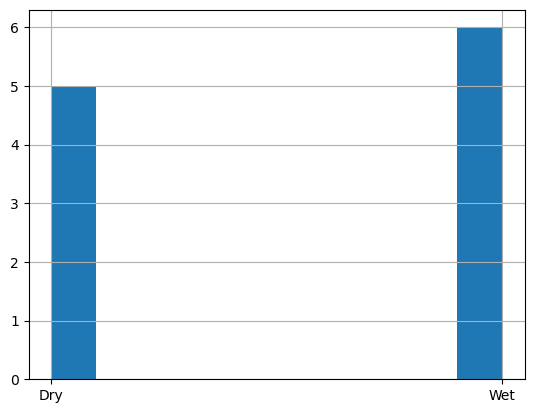

In [33]:
df_hourly_amc[hourly_series>thresh_1]['AMC_condition'].hist()

<Axes: >

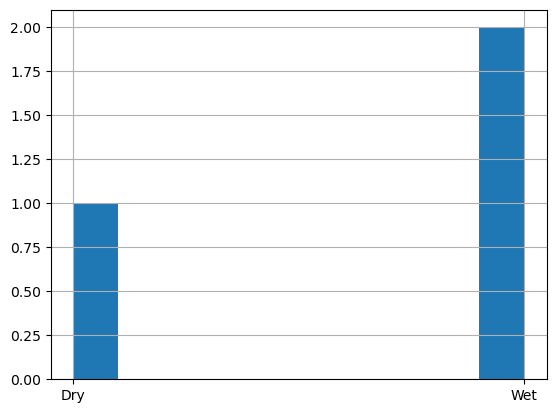

In [34]:
df_hourly_amc[hourly_series>thresh_2]['AMC_condition'].hist()

In [57]:
def analyze_aorc_amc_plots(lat, lon, thresholds_in, start_year=1979, end_year=2024):
    base_url = 's3://noaa-nws-aorc-v1-1-1km'
    var = 'APCP_surface'
    thresholds_mm = [t * 25.4 for t in thresholds_in]  # Convert to mm
    years = range(start_year, end_year + 1)

    all_ts = []
    for year in tqdm(years, desc="Loading years"):
        url = f"{base_url}/{year}.zarr/"
        ds = xr.open_zarr(url, consolidated=True, storage_options={"anon": True})
        precip_ts = ds[var].sel(latitude=lat, longitude=lon, method='nearest')
        all_ts.append(precip_ts.to_series())

    hourly_series = pd.concat(all_ts)
    # === Compute 5-day total ===
    antecedent_5day = hourly_series.rolling(window=120).sum().shift(1)

    # === Plot 1: Full Hourly Time Series with Annual Maxima and Thresholds ===
    fig, ax = plt.subplots(figsize=(8, 4))

    # Primary y-axis: Hourly precipitation
    hourly_series.plot(ax=ax, label='Hourly Precipitation', color='skyblue', linewidth=1)

    # Secondary y-axis: 5-day antecedent rainfall
    ax2 = ax.twinx()
    antecedent_5day.plot.line(ax=ax2, label='5-Day Rainfall', color='black', linewidth=0.5, alpha=0.3, zorder=1)

    # Annual maxima
    annual_max_idx = hourly_series.resample('YE').apply(lambda x: x.idxmax()).dropna()
    annual_max_values = hourly_series.loc[annual_max_idx].dropna()
    annual_max_values = annual_max_values[annual_max_values.index.isin(hourly_series.index)]
    ax.scatter(
        annual_max_values.index,
        annual_max_values.values,
        marker='*',
        s=120,
        facecolors='white',
        edgecolors='red',
        linewidths=1.2,
        label='Annual Maxima',
        zorder=5
    )

    # Thresholds (2-year and 5-year)
    linestyles = ['--', '-.']
    threshold_labels = ['2-Year Threshold', '5-Year Threshold']
    for i, (t_mm, t_in) in enumerate(zip(thresholds_mm[:2], thresholds_in[:2])):
        ax.axhline(
            t_mm,
            color='red',
            linestyle=linestyles[i % len(linestyles)],
            linewidth=2,
            label=f'{threshold_labels[i]}'
        )

    # Shade dormant and growing seasons
    for year in range(hourly_series.index.min().year, hourly_series.index.max().year + 1):
        ax.axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year + 1}-04-30'),
                color='lightgrey', alpha=0.3,
                label='Dormant Season' if year == hourly_series.index.min().year else "")
        ax.axvspan(pd.Timestamp(f'{year + 1}-05-01'), pd.Timestamp(f'{year + 1}-10-31'),
                color='lightgreen', alpha=0.15,
                label='Growing Season' if year == hourly_series.index.min().year else "")

    # Axis formatting
    ax.set_ylabel("Hourly Precipitation (mm)")
    ax.set_ylim(bottom=0)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax2.set_ylabel("5-Day Rainfall (mm)")
    ax2.set_ylim(bottom=0)

    # Combine legends from both axes
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(handles1 + handles2, labels1 + labels2, ncol=3)

    plt.tight_layout()
    plt.show()

    # === Compute 5-day total ===
    antecedent_5day = hourly_series.rolling(window=120).sum().shift(1)

    def classify_amc(ts, rain_5d):
        m = ts.month
        if pd.isna(rain_5d):
            return None
        if 5 <= m <= 10:
            if rain_5d < 35.6: return 'Dry'
            elif rain_5d <= 53.4: return 'Normal'
            else: return 'Wet'
        else:
            if rain_5d < 12.7: return 'Dry'
            elif rain_5d <= 28: return 'Normal'
            else: return 'Wet'

    amc = pd.Series(
        [classify_amc(ts, rain) for ts, rain in antecedent_5day.items()],
        index=antecedent_5day.index
    )

    df = pd.DataFrame({
        'hourly_rain_mm': hourly_series,
        'antecedent_5day_mm': antecedent_5day,
        'AMC': amc
    })

    
    # === Merged AMC Distributions on Same Axis ===
    plt.figure(figsize=(4, 3))
    bar_width = 0.2
    amc_order = ['Dry', 'Normal', 'Wet']

    # --- 1. Plot AMC at Annual Maxima ---
    annual_max_idx = hourly_series.resample('YE').apply(lambda x: x.idxmax()).dropna()
    amc_annual_max = df.loc[annual_max_idx, 'AMC']
    counts_annual = amc_annual_max.value_counts(normalize=True).reindex(amc_order).fillna(0)
    plt.bar(
        [x for x in range(len(amc_order))],
        counts_annual.values,
        width=bar_width,
        label='Annual maxima',
        edgecolor='black',
        color='gray'
    )

    # --- 2. Plot AMC for each threshold ---
    threshold_labels = ['>2-yr', '>5-yr']
    threshold_colors = ['lightblue', 'darkblue']  

    for i, (t_mm, t_in) in enumerate(zip(thresholds_mm, thresholds_in)):
        subset = df[df['hourly_rain_mm'] > t_mm]
        counts = subset['AMC'].value_counts(normalize=True).reindex(amc_order).fillna(0)
        # Offset bar position to avoid overlap
        offset = (i + 1) * bar_width
        plt.bar(
            [x + offset for x in range(len(amc_order))],
            counts.values,
            width=bar_width,
            label=threshold_labels[i],
            color=threshold_colors[i],
            edgecolor='black'
        )

    # --- Formatting ---
    total_bars = len(thresholds_in) + 1
    midpoints = [x + bar_width * (total_bars - 1) / 2 for x in range(len(amc_order))]
    plt.xticks(midpoints, amc_order, fontsize=12)
    plt.ylabel("Probability", fontsize=12)

    #plt.title("AMC Probabilities (Annual Maxima & Threshold Events)", fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(
    ncol=3,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # below the plot
    frameon=False
    )
    plt.tight_layout()
    plt.show()

In [ ]:
thresholds = [1.17, 1.52]  # in inches
lat_nys = 41.2
lon_nys = -73.8
analyze_aorc_amc_plots(lat_nys, lon_nys, thresholds)

Loading years:   2%|▏         | 1/46 [00:05<04:13,  5.63s/it]

Loading years: 100%|██████████| 46/46 [00:46<00:00,  1.00s/it]


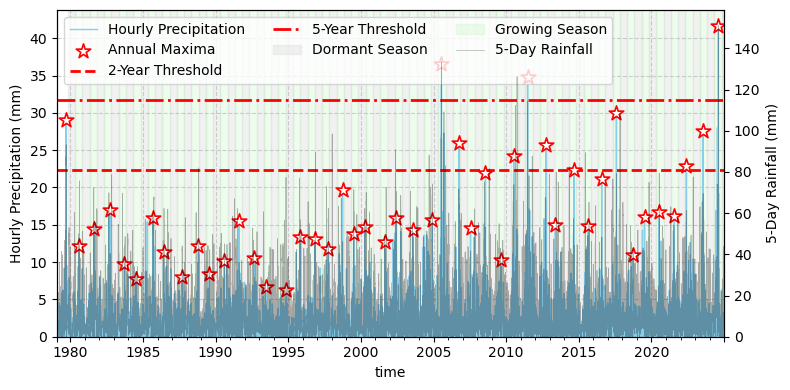

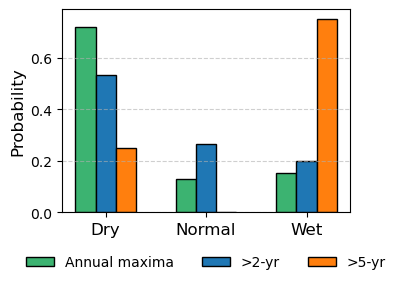

In [ ]:
thresholds = [0.878, 1.25]  # in inches
lat_nys = 44.2486
lon_nys = -75.4346
analyze_aorc_amc_plots(lat_nys, lon_nys, thresholds)

Loading years: 100%|██████████| 46/46 [00:41<00:00,  1.12it/s]


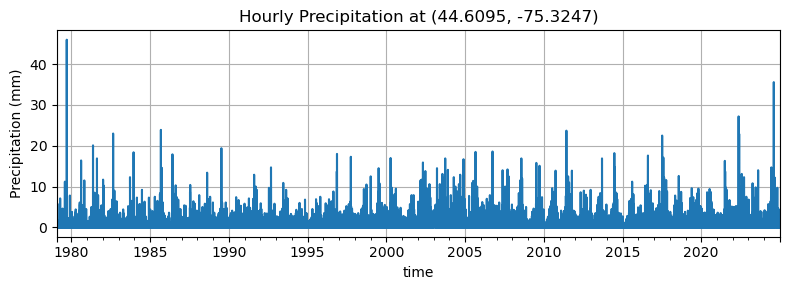

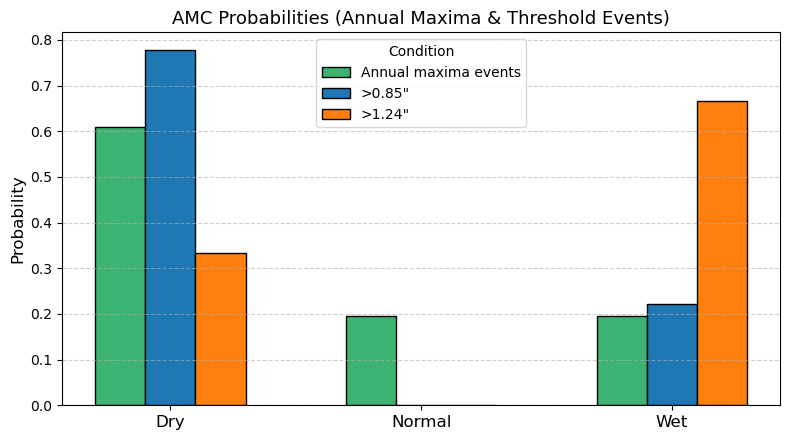

In [ ]:
thresholds = [0.850, 1.24]  # in inches
lat_nys =  44.6095
lon_nys = -75.3247

analyze_aorc_amc_plots(lat_nys, lon_nys, thresholds)

Loading years: 100%|██████████| 46/46 [00:49<00:00,  1.09s/it]


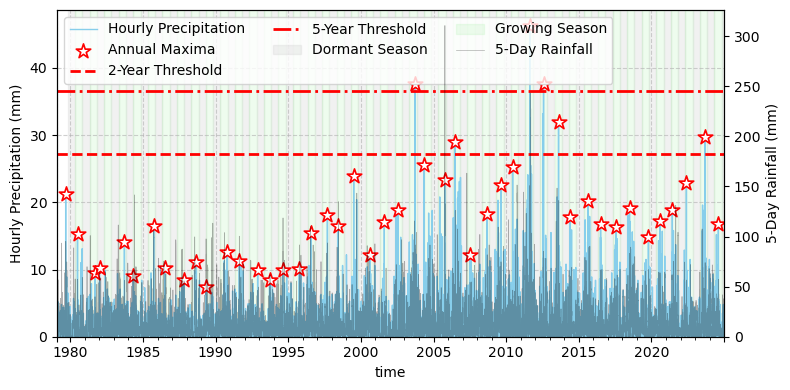

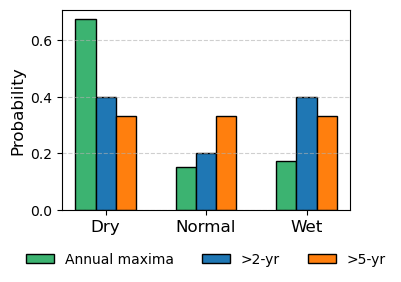

In [ ]:
thresholds = [1.07, 1.44]  # in inches
lat_nys =  41.5451
lon_nys = -74.2920

analyze_aorc_amc_plots(lat_nys, lon_nys, thresholds)

Loading years: 100%|██████████| 46/46 [00:51<00:00,  1.13s/it]


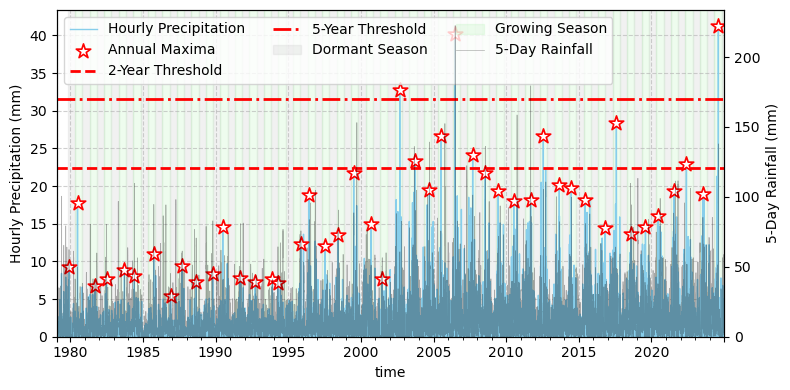

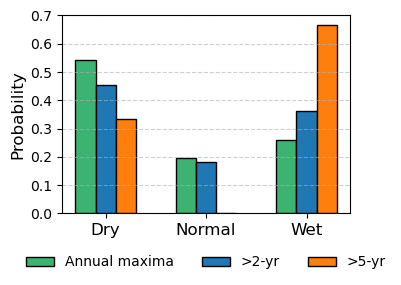

In [ ]:
thresholds = [0.880, 1.24]  # in inches
lat_nys =  42.2321
lon_nys = -74.6656

analyze_aorc_amc_plots(lat_nys, lon_nys, thresholds)